__Import the Dependencies for model trianing__

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import pandas as pd

In [27]:
df=pd.read_csv(r"E:\Resume Machine Learning Projects\Bangalore House Prices\notebook\cleaned.csv")

In [28]:
df.head()

,Unnamed: 0,area_type,location,size,society,total_sqft,bath,balcony,price
0,0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,1,Plot Area,Chikka Tirupathi,4 BHK,Theanmp,2600,5.0,3.0,120.00
2,2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [29]:
df=df.drop(columns=["Unnamed: 0","society","location"],axis=1)

In [30]:
df.head()

,area_type,size,total_sqft,bath,balcony,price
0,Super built-up Area,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,4 BHK,2600,5.0,3.0,120.00
2,Built-up Area,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,2 BHK,1200,2.0,1.0,51.00


<Axes: >

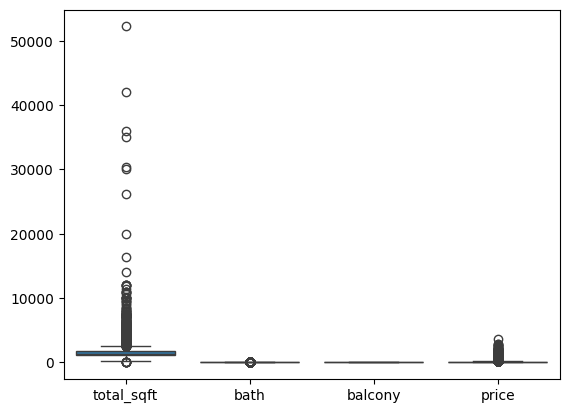

In [48]:
import seaborn as sns
sns.boxplot(df)

In [31]:
def convert_sqft(value):
    value = str(value).strip()
    if '-' in value:  # Handle range values
        values = value.split('-')
        return (float(values[0]) + float(values[1])) / 2  # Take the average
    try:
        return float(value)  # Convert directly if numeric
    except:
        return None  # Convert invalid values to NaN

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)


__Divide the data into X and Y__

In [32]:
X=df.drop(columns="price", axis=1)
Y=df["price"]

In [33]:
X.head()

,area_type,size,total_sqft,bath,balcony
0,Super built-up Area,2 BHK,1056.0,2.0,1.0
1,Plot Area,4 BHK,2600.0,5.0,3.0
2,Built-up Area,3 BHK,1440.0,2.0,3.0
3,Super built-up Area,3 BHK,1521.0,3.0,1.0
4,Super built-up Area,2 BHK,1200.0,2.0,1.0


In [34]:
cat_features=[feature for feature in df.columns if df[feature].dtype=='object']
print('\nWe have {} categorical features : {}'.format(len(cat_features), cat_features))


num_features=[feature for feature in df.columns if df[feature].dtype!="object"]
print('\nWe have {} num_features  : {}'.format(len(num_features), num_features))


We have 2 categorical features : ['area_type', 'size']

We have 4 num_features  : ['total_sqft', 'bath', 'balcony', 'price']


In [35]:
cat_features

['area_type', 'size']

In [36]:
num_features

['total_sqft', 'bath', 'balcony', 'price']

In [37]:
print("Categories in 'area_type' variable:     ",end=" " )
print(df['area_type'].unique())




print("categories in size  variable:  ",end="")
print(df["size"].unique())
print("")


print("categories in total_sqft  variable:  ",end="")
print(df["total_sqft"].unique())

Categories in 'area_type' variable:      ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
categories in size  variable:  ['2 BHK' '4 BHK' '3 BHK' '6 BHK' '1 BHK' '1 RK' '8 BHK' '7 BHK' '5 BHK'
 '11 BHK' '9 BHK' nan '27 BHK' '10 BHK' '19 BHK' '16 BHK' '43 BHK'
 '14 BHK' '12 BHK' '13 BHK' '18 BHK']

categories in total_sqft  variable:  [1056.  2600.  1440.  ... 1258.5  774.  4689. ]


In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder



cat_features = ['area_type', 'size']  # Nominal categorical features
 # Ordinal categorical feature
num_features = ['bath', 'balcony',  'total_sqft']  # Numeric features

# Define transformers
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # Handle missing values
    ("scaler", StandardScaler())  # Scale numeric features
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Fill missing categorical values
    ("onehot_encoder", OrdinalEncoder() ) # Convert to one-hot
])



# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipeline", num_pipeline, num_features),
        ("cat_pipeline", cat_pipeline, cat_features),
        
    ]
)

In [39]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['bath', 'balcony', 'total_sqft']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot_encoder',
                                                  OrdinalEncoder())]),
                                 ['area_type', 'size'])])

In [40]:
X=preprocessor.fit_transform(X)

In [41]:
X.shape

(12791, 5)

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [43]:
pd.DataFrame(x_train)

,0,1,2,3,4
0,-1.258085,-1.983498,-0.801950,3.0,0.0
1,0.956129,0.492680,-0.563407,2.0,13.0
2,0.218057,-0.745409,0.153015,3.0,12.0
3,-0.520014,-0.745409,-0.431414,3.0,10.0
4,-0.520014,0.492680,-0.172198,3.0,10.0
...,...,...,...,...,...
10227,-0.520014,1.730770,-0.293059,3.0,10.0
10228,0.956129,-0.745409,0.422568,3.0,13.0
10229,-0.520014,-0.745409,-0.690630,3.0,10.0
10230,0.956129,0.492680,-0.293059,2.0,16.0


__Model Building__

In [44]:
models={
    "LinearRegression":LinearRegression(),
    "SVR":SVR(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
     "GradientBoostingRegressor":GradientBoostingRegressor(),
     "AdaBoostRegressor":AdaBoostRegressor()
}

In [45]:
def evalute_model(true,predict):
    mse=mean_squared_error(true,predict)
    mae=mean_absolute_error(true,predict)
    score=r2_score(true,predict)

    return mse,mae,score

In [46]:
r2_list=[]
model_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)
    

    y_pred_test=model.predict(x_test)
    y_pred_train=model.predict(x_train)



    test_mse,test_mae,test_r2=evalute_model(y_test,y_pred_test)
    train_mse,train_mae,train_r2=evalute_model(y_train,y_pred_train)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(train_mse))
    print("- Mean Absolute Error: {:.4f}".format(train_mae))
    print("- R2 Score: {:.4f}".format(train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(test_mse))
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- R2 Score: {:.4f}".format(test_r2))
    r2_list.append(test_r2)
    
    print('='*35)
    print('\n')

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 13553.0119
- Mean Absolute Error: 45.1832
- R2 Score: 0.4124
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 15880.1921
- Mean Absolute Error: 47.0297
- R2 Score: 0.2928


SVR
Model performance for Training set
- Root Mean Squared Error: 17564.8394
- Mean Absolute Error: 46.2580
- R2 Score: 0.2385
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 16634.9732
- Mean Absolute Error: 46.9205
- R2 Score: 0.2592


KNeighborsRegressor
Model performance for Training set
- Root Mean Squared Error: 7290.4792
- Mean Absolute Error: 33.1846
- R2 Score: 0.6839
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9289.9419
- Mean Absolute Error: 40.6562
- R2 Score: 0.5863


DecisionTreeRegressor
Model performance for Training set
- Root Mean Squared Error: 860.2923
- Mean Absolute Error: 10.8593


In [47]:
df.to_csv("pure_cleaned_data.csv")

In [ ]:
models={
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [ ]:
params={
    "GRadient_params":{
       'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
       "n_estimators":[100,0.01,0.0001],
       "learning_rate": 0.1,
       "min_samples_split": 2,
        "max_depth": [3, 4, 5]
    },
    "KNeighborsRegressor":{
        "n_neighbors": [3, 5, 7, 9, 11],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    },
    "RandomForestRegressor":{
        "criterion":['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
        "n_estimators":[100,120,200,250],
        "max_depth": [5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

for model_name,model in models.items():
    print(f" Tuning the {model_name}")

random_search=RandomizedSearchCV(estimator=model,param_distributions=params[model_name],cv=3,n_jobs=-1,n_iter=100)

In [25]:
random_search.fit(x_train,y_train)

KeyboardInterrupt: 

In [ ]:
print("Best Parameters:", random_search.best_params_)

In [ ]:
best_model={}

best_model[model_name]=random_search.best_estimator_

In [ ]:
best_model[model_name]

In [ ]:
y_pred_test=best_model["RandomForestRegressor"].predict(x_test)

y_pred_train=best_model["RandomForestRegressor"].predict(x_train)

In [ ]:
score=r2_score(y_test,y_pred_test)
print(score)

score_train=r2_score(y_train,y_pred_train)
print(score_train)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred_train)

In [ ]:
residuals=y_train-y_pred_train

In [ ]:
import seaborn as sns
sns.displot(residuals)

In [ ]:
plt.scatter(residuals,y_train)